# Net Factor Performance

#### Import

In [1]:
#Import
import os
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from prettytable import PrettyTable

#Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Manage time
from datetime import datetime, timedelta

#Plot
import seaborn as sns
import matplotlib.pyplot as plt

#Ip widget
import ipywidgets as widgets

In [2]:
#Prevent warnings
import warnings
warnings.filterwarnings("ignore")

#### 1.Download factor description & market returns

In [3]:
#Download factor description
desc_factor = pd.read_excel(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Factor Details.xlsx")

#Download markt returns
market_ret = pd.read_csv(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\market_returns.csv")

#### 2. Download country class

In [4]:
class_country = pd.read_excel(r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Country Classification.xlsx")

In [5]:
#Country ISO code
iso_list=[]

#Country for which we have data
for cnt in class_country["excntry"].values.tolist():
    try:
        main_p = r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Country Factors"
        path = os.path.join(main_p,cnt+".csv")
        cnt_lms = pd.read_csv(path)
        iso_list.append(cnt)
    except:
        pass

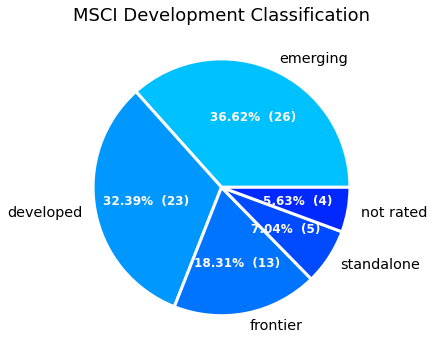

In [6]:
#MSCI Classification - Pct of countries representation
y = class_country[class_country["excntry"].isin(iso_list)]["msci_development"].value_counts().values
mylabels =  class_country[class_country["excntry"].isin(iso_list)]["msci_development"].value_counts().index.tolist()

#Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# Colour 
num_colors = len(y)
hue_values = np.linspace(0.55, 0.65, num_colors)
colors = [plt.cm.hsv(h) for h in hue_values]

#Plotting

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

patches, texts, pcts = ax.pie(
    y, labels=mylabels, 
    autopct= make_autopct(y),
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors = colors)

# Style just the percent values.
plt.setp(pcts, color='floralwhite', fontweight='bold', fontsize="large")

ax.set_title('MSCI Development Classification', fontsize=18)
plt.tight_layout()

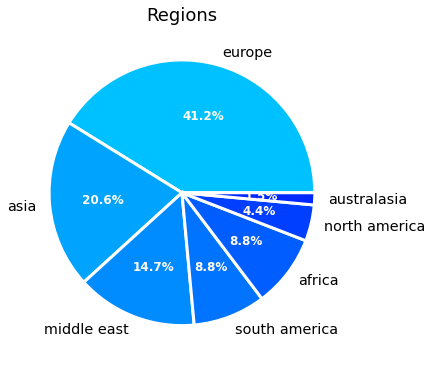

In [7]:
#Regions - Pct of countries representation
y = class_country[class_country["excntry"].isin(iso_list)]["region"].value_counts().values
mylabels =  class_country[class_country["excntry"].isin(iso_list)]["region"].value_counts().index.tolist()

#Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# Colour 
num_colors = len(y)
hue_values = np.linspace(0.55, 0.65, num_colors)
colors = [plt.cm.hsv(h) for h in hue_values]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plotting
patches, texts, pcts = ax.pie(
    y, labels=mylabels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors = colors)

# Style just the percent values.
plt.setp(pcts, color='floralwhite', fontweight='bold', fontsize="large")

ax.set_title('Regions', fontsize=18)
plt.tight_layout()

#### 3. Filter Country with not enough datapoints for study

In [8]:
#Download Country factor returns
toremove_list = []
for iso in iso_list:
    main_p = r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Country Factors"
    path = os.path.join(main_p,iso+".csv")
    cnt_lms = pd.read_csv(path)
    
    #Find charac with the most datapoints
    size_max = cnt_lms.groupby("characteristic").size().max()

    #50% of data over 11 years for monthly
    limit = (6*12)
    if size_max < limit:
        toremove_list.append(iso)

#Update ISO list
iso_list = [x for x in iso_list if x not in toremove_list]
        
print(len(toremove_list), "do not present sufficient data")
print(toremove_list)

19 do not present sufficient data
['BHR', 'BGD', 'ROU', 'OMN', 'TTO', 'HRV', 'KEN', 'CZE', 'HUN', 'JOR', 'JAM', 'SVN', 'IRN', 'ISL', 'LKA', 'LUX', 'UKR', 'CYP', 'ZWE']


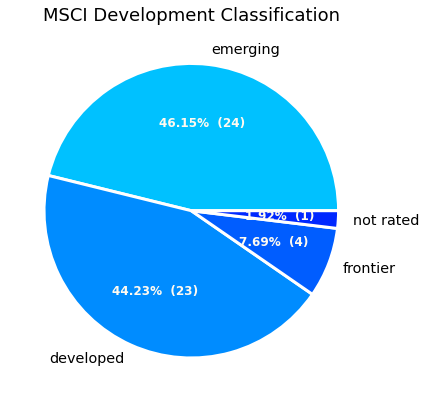

In [9]:
#MSCI Classification - Pct of countries representation
y = class_country[class_country["excntry"].isin(iso_list)]["msci_development"].value_counts().values
mylabels =  class_country[class_country["excntry"].isin(iso_list)]["msci_development"].value_counts().index.tolist()

#Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# Colour 
num_colors = len(y)
hue_values = np.linspace(0.55, 0.65, num_colors)
colors = [plt.cm.hsv(h) for h in hue_values]

#Plotting

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

patches, texts, pcts = ax.pie(
    y, labels=mylabels, 
    autopct= make_autopct(y),
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors = colors)

# Style just the percent values.
plt.setp(pcts, color='floralwhite', fontweight='bold', fontsize="large")

ax.set_title('MSCI Development Classification', fontsize=18)
plt.tight_layout()

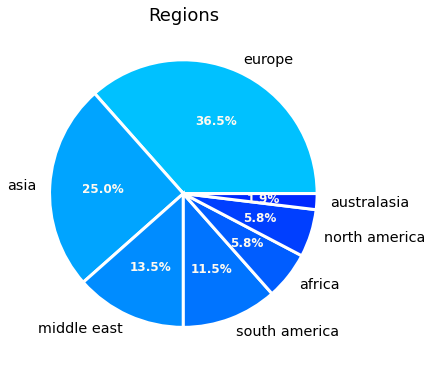

In [10]:
#Regions - Pct of countries representation
y = class_country[class_country["excntry"].isin(iso_list)]["region"].value_counts().values
mylabels =  class_country[class_country["excntry"].isin(iso_list)]["region"].value_counts().index.tolist()

#Create pie chart
fig, ax = plt.subplots(figsize=(6, 6))

# Colour 
num_colors = len(y)
hue_values = np.linspace(0.55, 0.65, num_colors)
colors = [plt.cm.hsv(h) for h in hue_values]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plotting
patches, texts, pcts = ax.pie(
    y, labels=mylabels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    colors = colors)

# Style just the percent values.
plt.setp(pcts, color='floralwhite', fontweight='bold', fontsize="large")

ax.set_title('Regions', fontsize=18)
plt.tight_layout()

#### 4. Mapping
- Significant alpha for OLS (p-value)
- Alpha same sign as for the US market: US benchmark

In [11]:
def mapping(iso):
    #Download markt returns
    cnt_ret = market_ret[market_ret["excntry"]== iso].reset_index().drop(columns=["index"])
    cnt_ret["eom"] = pd.to_datetime(cnt_ret["eom"], format="%Y-%m-%d")#Convert eom to datetime

    #Download Country factor returns
    main_p = r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Country Factors"
    path = os.path.join(main_p,iso+".csv")
    cnt_lms = pd.read_csv(path)
    cnt_lms["eom"] = pd.to_datetime(cnt_lms["eom"], format="%Y-%m-%d")#Convert eom to datetime

    #For now only keep equally weighted & start in 1927
    factor_df = cnt_lms[["eom","ret_ew", "characteristic"]]
    market_df = cnt_ret[["eom", "mkt_ew"]]

    #Get the year 
    factor_df["year"] = factor_df["eom"].dt.year
    market_df["year"] = market_df["eom"].dt.year

    #Only keep year after 1960
    #Adjust because market data only goes to 2020
    factor_df = factor_df[(factor_df["year"]>1960) & (factor_df["year"]<2021)]
    market_df = market_df[market_df["year"]>1960]
    
    #Group by characteristics
    factor_df = factor_df.groupby("characteristic")
    
    # Create empty lists to store the results
    results=[]
    
    #Loop on the characteristics
    for c in factor_df.groups.keys():   
        #Store the data of the characteristic dataframe
        data_df = factor_df.get_group(c)
        
        #Start & End of in sample period
        in_period = desc_factor[desc_factor["abr_jkp"]==c]["in-sample period"].values[0].split("-")
        start_in = int(in_period[0])
        end_in = int(in_period[1])
        
        #Get the period for each df
        data_df = data_df[(data_df["year"]>start_in)
                          & (data_df["year"]<end_in)][["eom","ret_ew"]]
        market_c_df = market_df[(market_df["year"]>start_in)
                              & (market_df["year"]<end_in)][["eom","mkt_ew"]]
        
        #Enough datapoints: 2 years of data needed
        if data_df.empty:
            min_date = 0
        else:
            min_date = int(data_df["eom"].dt.year.min())
    
        if int(min_date) <= (end_in-2):
            #Avoid missmatch in date and size lenght
            merge_df = pd.merge(data_df, market_c_df, on="eom", how="inner")
            
            ################
            ###REGRESSION###
            ################
            #Test - Missing data can lead to missmatch in length raising an error
            try:
                # Fit a linear regression model to the data
                # ft = alpha + beta*rm
                #Compare to the beta method we invert x and y
                X = sm.add_constant(merge_df["mkt_ew"].tolist())
                model = sm.OLS(merge_df["ret_ew"].tolist(), X).fit() #sm.OLS(y, X)

                # Extract the alpha and beta coefficients
                alpha = model.params[0]
                beta = model.params[1]

                #pvalue alpha
                p_val = model.pvalues[0]

                # Append the results to the list
                results.append({'Characteristic': c, 'alpha': alpha, 'p_value': p_val})
            except:
                pass
            
    results_df = pd.DataFrame(results)

    return(results_df)

In [12]:
#Benchmark
us = mapping("USA")
#Characteristic that are statistically significants
us = us[us["p_value"]<0.05]
#Add mapping for alpha sign 
us["sign"] = us["alpha"].apply(lambda x: 1 if x > 0 else -1)

##### 4.a Selecting on significant characteristics

In [13]:
#Selecting Characteristics Based on Statistical Significance
pval = []

#Loop on countries in our dataset
for cnt in iso_list:
    cnt_data = mapping(cnt)
    #filter on p_value
    cnt_data = cnt_data[cnt_data["p_value"]<0.05]
    pval.append({"country":cnt, "nb_charac": cnt_data.shape[0], "list_c": cnt_data["Characteristic"].tolist()})

pval_df = pd.DataFrame(pval)

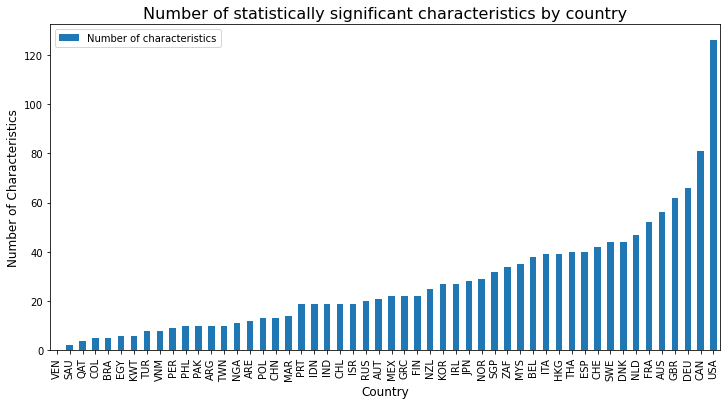

In [14]:
#Plot results for visualization
pval_df = pval_df.sort_values("nb_charac")
fig, ax = plt.subplots(figsize=(12, 6))
pval_df.plot.bar(x='country', y='nb_charac', rot=90, ax=ax, label = "Number of characteristics")

# set plot title and axis labels
ax.set_title('Number of statistically significant characteristics by country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Characteristics', fontsize=12);

##### 4.b Selecting significant characteristics with the right direction

In [15]:
#Empty list to store the info
cnt_info =[]

#Loop on countries in our dataset
for cnt in iso_list:
    cnt_data = mapping(cnt)
    #filter on p_value
    cnt_data = cnt_data[cnt_data["p_value"]<0.05]
    
    #add column for sign
    cnt_data["sign"] = cnt_data["alpha"].apply(lambda x: 1 if x > 0 else -1)
    #Merge and select charac with same sign
    merge_df = pd.merge(cnt_data, us, on="Characteristic")
    merge_df = merge_df[merge_df["sign_y"] == merge_df["sign_y"]]
    
    cnt_info.append({"country":cnt, "nb_charac": merge_df.shape[0], "list_c": merge_df["Characteristic"].tolist()})

cnt_df = pd.DataFrame(cnt_info)

#add pvalue
cnt_df = pd.merge(cnt_df, pval_df[["country","nb_charac"]], on="country")
cnt_df.columns = ["country", "nb_charac","list_c","nb_pval"]
#Difference 
cnt_df["nb_pval"] = cnt_df["nb_pval"] - cnt_df["nb_charac"]

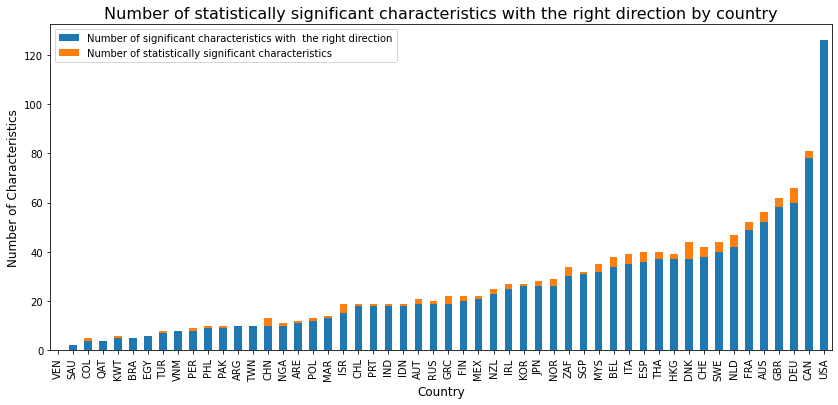

In [16]:
#Plot results for visualization
data_df = cnt_df[["country","nb_charac","nb_pval"]]
data_df.sort_values("nb_charac", inplace = True)

#Plot
ax = data_df.plot.bar(x='country', stacked=True, figsize=(14, 6), rot=90)

# Create the legend
legend = ax.legend()

# Change the label of the legend
for text in legend.get_texts():
    if text.get_text() == 'nb_charac':
        text.set_text('Number of significant characteristics with  the right direction')
    elif text.get_text() == 'nb_pval':
        text.set_text('Number of statistically significant characteristics')

# set plot title and axis labels
ax.set_title('Number of statistically significant characteristics with the right direction by country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Characteristics', fontsize=12);

In [17]:
#Update iso list to only keep countries where we do have characteristics to study
iso_list = cnt_df[cnt_df["nb_charac"] != 0]["country"].tolist()
print(iso_list)

['USA', 'CHN', 'JPN', 'HKG', 'GBR', 'IND', 'TWN', 'KOR', 'CAN', 'AUS', 'DEU', 'FRA', 'SWE', 'CHE', 'THA', 'IDN', 'BRA', 'SGP', 'MYS', 'ITA', 'ZAF', 'ESP', 'MEX', 'RUS', 'ISR', 'SAU', 'NLD', 'PHL', 'NOR', 'CHL', 'BEL', 'TUR', 'DNK', 'FIN', 'ARE', 'POL', 'NZL', 'VNM', 'AUT', 'QAT', 'KWT', 'PER', 'COL', 'GRC', 'PAK', 'MAR', 'IRL', 'EGY', 'ARG', 'NGA', 'PRT']


In [18]:
#Drop column with diff 
cnt_df.drop(columns=["nb_pval"], inplace=True)

#### 4. Creation of the get_data() funtion

In [19]:
def get_data(iso):
    #Download markt returns
    cnt_ret = market_ret[market_ret["excntry"]== iso].reset_index().drop(columns=["index"])
    cnt_ret["eom"] = pd.to_datetime(cnt_ret["eom"], format="%Y-%m-%d")#Convert eom to datetime

    #Download Country factor returns
    main_p = r"C:\EDHEC\M2\Cours\Master thesis\Data\Git_Jessen\Country Factors"
    path = os.path.join(main_p,iso+".csv")
    cnt_lms = pd.read_csv(path)
    cnt_lms["eom"] = pd.to_datetime(cnt_lms["eom"], format="%Y-%m-%d")#Convert eom to datetime

    #For now only keep equally weighted & start in 1927
    factor_df = cnt_lms[["eom","ret_ew", "characteristic"]]
    market_df = cnt_ret[["eom", "mkt_ew"]]
    
    #Only keep the characteristic defined above in mapping
    charac_interest = cnt_df[cnt_df["country"] == iso]["list_c"].tolist()[0]
    factor_df = factor_df[factor_df["characteristic"].isin(charac_interest)]

    #Get the year 
    factor_df["year"] = factor_df["eom"].dt.year
    market_df["year"] = market_df["eom"].dt.year

    #Only keep year after 1960
    #Adjust because market data only goes to 2020
    factor_df = factor_df[(factor_df["year"]>1960) & (factor_df["year"]<2021)]
    market_df = market_df[market_df["year"]>1960]

    #Group by year
    factor_yearly = factor_df.groupby(["year", "characteristic"])
    market_yearly = market_df.groupby("year")

    # Create empty lists to store the results
    results=[]
    
    ################################
    #######   Regression ###########
    ################################

    # Loop through each year and characteristics
    for name, data in factor_yearly:
        year, charac = name

        # Get the market and portfolio returns for the current year and portfolio
        market_returns = market_yearly.get_group(year)["mkt_ew"].tolist()
        fct_returns = data["ret_ew"].tolist()

        #Test - Missing data can lead to missmatch in length raising an error
        try:
            # Fit a linear regression model to the data
            # ft = alpha + beta*rm
            #Compare to the beta method we invert x and y
            X = sm.add_constant(market_returns)
            model = sm.OLS(fct_returns, X).fit() #sm.OLS(y, X)

            # Extract the alpha and beta coefficients
            alpha = model.params[0]
            beta = model.params[1]

            # Append the results to the list
            results.append({'Year': year, 'Characteristic': charac, 'Alpha': alpha, 'Beta': beta})

        except:
            pass

    # Convert to a dataframe to store the results
    results_df = pd.DataFrame(results)
    
    ###################
    ### Winsorization##
    ###################

   #Adjust for extremes values
    results_adj_df = results_df.copy() #create df to store data
    
    for c in results_df["Characteristic"].unique():
        #create copy df 
        temp_df = results_df[(results_df["Characteristic"] == c)].copy()
        #Winsorization 90%
        temp_df["Alpha"] = winsorize(temp_df["Alpha"], limits=(0.05, 0.05))

        #Add results
        results_adj_df[(results_adj_df["Characteristic"] == c)] = temp_df

    return(results_adj_df)

#### 5. Plot function alpha in-sample vs out-sample
Scatter plot:
- x-axis: net performance in sample
- y-axis: Change in net performance

Regression:
- Polynomial degree 2
- Linear

In [20]:
def plot_alpha_2(results_df,cnt, poly=True, linear = False):
    #create df to store data
    in_vs_out = pd.DataFrame(columns=["characteristic", "in_avg", "out_avg"])

    #Loop on characteristics
    for c in results_df["Characteristic"].unique():
        
        #In sample period
        in_period = desc_factor[desc_factor["abr_jkp"]==c]["in-sample period"].values[0].split("-")
        start_in = in_period[0]
        disc_year = in_period[1]
        
        #Enough datapoints: 2 years of data needed
        #Min date data
        min_date = int(results_df[results_df["Characteristic"]==c]["Year"].min())
        if int(min_date) <= (int(disc_year)-2):
        
            #Avg net performance before and after the discovery
            bef_avg = results_df[(results_df["Characteristic"]==c) 
                                 & (results_df["Year"]<int(disc_year))
                                 & (results_df["Year"]>int(start_in))]["Alpha"].mean()

            after_avg = results_df[(results_df["Characteristic"]==c) 
                                   & (results_df["Year"]>int(disc_year))]["Alpha"].mean()

            in_vs_out.loc[len(in_vs_out)] = [c, bef_avg, after_avg]

    # Create a scatter plot of the beta values over time
    fig, ax = plt.subplots(figsize=(12,6))
    
    #Need to dropna 
    in_vs_out.dropna(inplace=True)
    
    #Multiple by 100 to get pct
    in_vs_out[["in_avg","out_avg"]] = in_vs_out[["in_avg","out_avg"]].apply(lambda x: x * 100)
    
    #Compute the net performance decline
    in_vs_out["decline"] = in_vs_out["out_avg"] - in_vs_out["in_avg"]

    #Define X and Y
    X = in_vs_out["in_avg"]
    Y = in_vs_out["decline"]
    ax.scatter(X, Y)#Scatter plot
    
    #Poly numpy degree 2
    if poly:
        X_bis = X.values.reshape(-1,1)
        #Model
        polynomial_features = PolynomialFeatures(degree=2)
        X_poly = polynomial_features.fit_transform(X_bis)
        pr_model = sm.OLS(Y, X_poly).fit()
        
        #Plotting
        x_sorted = np.sort(X_bis,axis=0)
        y_pred_sorted = pr_model.predict(polynomial_features.fit_transform(x_sorted))
        ax.plot(x_sorted,y_pred_sorted, c="orange",
                linestyle="--", linewidth=3)
        
        #Summary Stat
        print(pr_model.summary())
    
    #Linear
    if linear:
        #Poly Regression
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()
        
        #Plotting
        x_sorted = np.sort(X,axis=0)
        y_pred_sorted = model.predict(x_sorted)
        ax.plot([x[1] for x in x_sorted], y_pred_sorted, c="orange",
                linestyle="--", linewidth=3)
        
        #Summary Stat
        print(model.summary())
        
    #axis
    ax.axvline(0, color="black")
    ax.axhline(0, color="black")
    ax.axline([0, 0], [1, -1], linestyle="--")

    #lim
    ax.set_xlim(in_vs_out["in_avg"].min()*1.3, in_vs_out["in_avg"].max()*1.3)
    ax.set_ylim(in_vs_out["decline"].min()*1.3, in_vs_out["decline"].max()*1.3)

    #label
    ax.set_xlabel("Net performance in-sample")
    ax.set_ylabel("Change in net performance")
    

    #title
    ax.set_title("Change in factor net performance - "+str(cnt))
    
    #retunr in_vs_out
    return in_vs_out

#### 6. Test - Choose a Market

In [21]:
w_iso = widgets.Dropdown(
    options=iso_list,
    value='USA',
    description='ISO CODE:',
    disabled=False,
    )
display(w_iso)

Dropdown(description='ISO CODE:', options=('USA', 'CHN', 'JPN', 'HKG', 'GBR', 'IND', 'TWN', 'KOR', 'CAN', 'AUS…

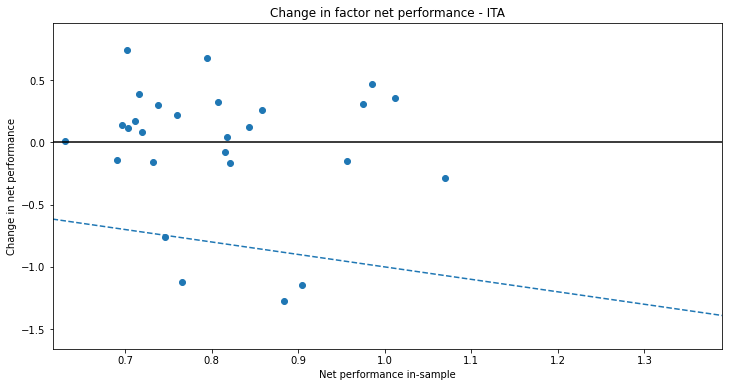

In [28]:
cnt = w_iso.value
cnt_data = get_data(cnt)
in_vs_out = plot_alpha_2(cnt_data, cnt, linear= False , poly= False)

**Observation**
High p-value indicate that the regression is not a polynomial but linear. What about the other markets?

#### 7. Quantifying the decrease in net performance
##### 7.a Initial Observation
Table with the number of characteristic tested and number with lower performance

In [29]:
#Create a df for alpha in_sample and out_sample 
#Create df to store data
in_vs_out = pd.DataFrame(columns=["iso", "characteristic", "in_avg", "out_avg"])
for iso in iso_list:
    results_df = get_data(iso) #get data
    #Loop on characteristics
    for c in results_df["Characteristic"].unique():
        #In sample period
        in_period = desc_factor[desc_factor["abr_jkp"]==c]["in-sample period"].values[0].split("-")
        start_in = in_period[0]
        disc_year = in_period[1]
        
        #Enough datapoints: 2 years of data needed
        #Min date data
        min_date = int(results_df[results_df["Characteristic"]==c]["Year"].min())
        if int(min_date) <= (int(disc_year)-2):
            #Avg of betas before and after the discovery
            bef_avg = results_df[(results_df["Characteristic"]==c) 
                                 & (results_df["Year"]<int(disc_year))
                                 & (results_df["Year"]>int(start_in))]["Alpha"].mean()

            after_avg = results_df[(results_df["Characteristic"]==c) 
                                   & (results_df["Year"]>int(disc_year))]["Alpha"].mean()

            in_vs_out.loc[len(in_vs_out)] = [iso, c, bef_avg, after_avg]

#Multiply by 100 to get pct
in_vs_out[["in_avg","out_avg"]] = in_vs_out[["in_avg","out_avg"]].apply(lambda x: x * 100)

#Compute performance change
in_vs_out["chng_perf"] = in_vs_out["out_avg"] - in_vs_out["in_avg"]

In [30]:
#Table nb charac tested and nb decline
copy_in_vs_out = in_vs_out.copy()
tab_df = in_vs_out[in_vs_out["out_avg"] < in_vs_out["in_avg"]].copy()
tab_df = pd.DataFrame(tab_df.groupby("iso").size()).reset_index()
copy_in_vs_out = pd.DataFrame(copy_in_vs_out.groupby("iso").size()).reset_index()
tab_df = tab_df.merge(copy_in_vs_out, on="iso")
tab_df.columns = ["country", "Nb with lower net performance" , "Nb characteristics selected"]
tab_df = tab_df.sort_values("Nb characteristics selected", ascending=False)
tab_df.T

,48,6,11,17,2,16,32,44,7,19,...,35,36,49,46,13,10,5,27,40,42
country,USA,CAN,DEU,GBR,AUS,FRA,NLD,SWE,CHE,HKG,...,PAK,PER,VNM,TUR,EGY,COL,BRA,KWT,QAT,SAU
Nb with lower net performance,92,54,37,35,35,35,30,30,21,17,...,9,7,6,4,5,3,4,1,2,2
Nb characteristics selected,126,78,60,58,51,49,42,40,38,37,...,9,8,7,6,5,4,4,4,3,2


In [31]:
temp = tab_df
temp.to_excel("./tab_temp.xlsx")

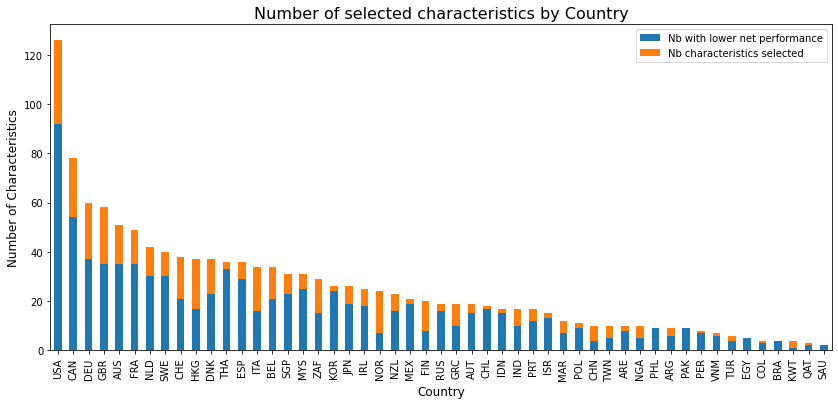

In [32]:
#Plot results for visualization
tab_df["Nb characteristics selected"] = tab_df["Nb characteristics selected"] - tab_df["Nb with lower net performance"]

#Plot
ax = tab_df.plot.bar(x='country', stacked=True, figsize=(14, 6), rot=90)

# set plot title and axis labels
ax.set_title('Number of selected characteristics by Country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Characteristics', fontsize=12);

In [33]:
sum_tab = pd.DataFrame(columns=["iso", "nb_tested", "lower_perf", "avg_decline"])
for iso in in_vs_out['iso'].unique():
    cnt_temp = in_vs_out[in_vs_out["iso"] == iso].copy()
    nb_test = cnt_temp.shape[0]
    lower_perf = in_vs_out[(in_vs_out["iso"] == iso)
                      &(in_vs_out["in_avg"] >0)
                      &(in_vs_out["chng_perf"] <0)].shape[0] +\
                in_vs_out[(in_vs_out["iso"] == iso)
                      &(in_vs_out["in_avg"] < 0)
                      &(in_vs_out["chng_perf"] > 0)].shape[0]
    avg_decline = (abs(in_vs_out[(in_vs_out["iso"] == iso)
                      &(in_vs_out["in_avg"] >0)
                      &(in_vs_out["chng_perf"] <0)]["chng_perf"].mean()) +\
                np.nan_to_num(in_vs_out[(in_vs_out["iso"] == iso)
                      &(in_vs_out["in_avg"] < 0)
                      &(in_vs_out["chng_perf"] > 0)]["chng_perf"].mean()))*100/2
    sum_tab.loc[len(sum_tab)] = [iso, nb_test, lower_perf, avg_decline]

#Smallest decline
print("------"*4)
print("Smallest Decline")
print("------"*4)
print(sum_tab.sort_values("avg_decline", ascending=True).head(5))

#Highest decline
print("------"*4)
print("Largest Decline")
print("------"*4)
print(sum_tab.sort_values("avg_decline", ascending=False).head(5))

------------------------
Smallest Decline
------------------------
    iso nb_tested lower_perf  avg_decline
11  FRA        49         34    14.563561
13  CHE        38         21    14.568080
5   IND        17         10    17.272792
17  SGP        31         23    18.386251
12  SWE        40         30    18.396811
------------------------
Largest Decline
------------------------
    iso nb_tested lower_perf  avg_decline
23  RUS        19         19   234.175939
49  NGA        10          6   169.809496
46  IRL        25         22   166.036949
28  NOR        24          8   146.883300
3   HKG        37         18   119.542732


**Average by MSCI classification**

In [34]:
#MSCI
sum_tab["msci"] = class_country[class_country["excntry"].isin(sum_tab["iso"])]["msci_development"].values

#MSCI Class
avg_msci_perf = pd.DataFrame(sum_tab.groupby('msci')['avg_decline'].mean())
print(avg_msci_perf.T)

msci         developed   emerging   frontier
avg_decline  50.298055  52.882358  75.524676


**Plotting to compare by countries**

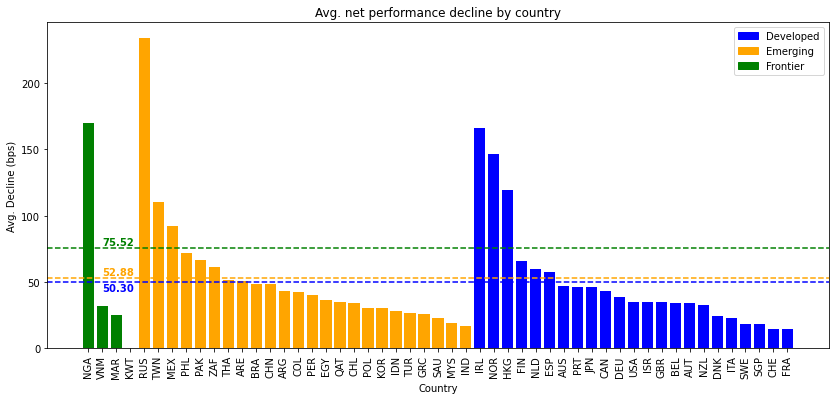

In [35]:
#Copy sum_tab and sort
df = sum_tab.copy()
df.sort_values(["msci", "avg_decline"], ascending=False, inplace=True)

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(14,6))

# Create the barplot
ax.bar(df['iso'], df['avg_decline'], color=df['msci'].map({'developed': 'blue', 'emerging': 'orange', 'frontier': 'green'}))

# Add axis labels and title
ax.set_xticklabels(df['iso'], rotation=90)
plt.xlabel('Country')
plt.ylabel('Avg. Decline (bps)')
plt.title('Avg. net performance decline by country')

# Add legend
developed_patch = plt.Rectangle((0, 0), 1, 1, color='blue')
emerging_patch = plt.Rectangle((0, 0), 1, 1, color='orange')
frontier_patch = plt.Rectangle((0, 0), 1, 1, color='green')
ax.legend([developed_patch, emerging_patch, frontier_patch], ['Developed', 'Emerging', 'Frontier'], loc='upper right')

# Add horizontal lines for the averages
avg_by_msci = df.groupby('msci')['avg_decline'].mean()
i = -5
for msci, avg in avg_by_msci.items():
    color = df[df['msci'] == msci]['msci'].map({'developed': 'blue', 'emerging': 'orange', 'frontier': 'green'}).iloc[0]
    ax.axhline(avg, color=color, linestyle='--')
    ax.text(1, avg + i, f"{avg:.2f}", ha='left', va='center', color=color, fontweight='bold')
    i = 5

# Show the plot
plt.show()

##### 7.b After 2000

In [36]:
c_select = desc_factor[["abr_jkp", "in-sample period"]].copy()
#Column with the discovery date
c_select["d_date"] = c_select["in-sample period"].apply(lambda x: str(x).split("-")[-1])
#Drop in sample period after using it
c_select.drop(columns=["in-sample period"], inplace = True)
#Drop nan
c_select.dropna(inplace = True)
#Convert to int
c_select["d_date"] = c_select["d_date"].astype(int)
#Only select characteristics discovered after 2000 (included)
c_select = c_select[c_select["d_date"] >= 2000]
#Display
c_select.sort_values("d_date").head()
print("Number of characteristics discovered after 2000: ", c_select.shape[0])

Number of characteristics discovered after 2000:  101


In [37]:
#Select only characteristic of interest
in_vs_out_after_2000 = in_vs_out[in_vs_out["characteristic"].isin(c_select["abr_jkp"])]

#Previous analysis
sum_tab = pd.DataFrame(columns=["iso", "nb_tested", "lower_perf", "avg_decline"])
for iso in in_vs_out_after_2000['iso'].unique():
    cnt_temp = in_vs_out_after_2000[in_vs_out["iso"] == iso].copy()
    nb_test = cnt_temp.shape[0]
    lower_perf = in_vs_out_after_2000[(in_vs_out_after_2000["iso"] == iso)
                      &(in_vs_out_after_2000["in_avg"] >0)
                      &(in_vs_out_after_2000["chng_perf"] <0)].shape[0] +\
                in_vs_out_after_2000[(in_vs_out_after_2000["iso"] == iso)
                      &(in_vs_out_after_2000["in_avg"] < 0)
                      &(in_vs_out_after_2000["chng_perf"] > 0)].shape[0]
    avg_decline = (abs(in_vs_out_after_2000[(in_vs_out_after_2000["iso"] == iso)
                      &(in_vs_out_after_2000["in_avg"] >0)
                      &(in_vs_out_after_2000["chng_perf"] <0)]["chng_perf"].mean()) +\
                np.nan_to_num(in_vs_out_after_2000[(in_vs_out_after_2000["iso"] == iso)
                      &(in_vs_out_after_2000["in_avg"] < 0)
                      &(in_vs_out_after_2000["chng_perf"] > 0)]["chng_perf"].mean()))*100/2
    sum_tab.loc[len(sum_tab)] = [iso, nb_test, lower_perf, avg_decline]
    
#Smallest decline
print("------"*4)
print("Smallest Decline")
print("------"*4)
print(sum_tab.sort_values("avg_decline", ascending=True).head(7))

#Highest decline
print("------"*4)
print("Largest Decline")
print("------"*4)
print(sum_tab.sort_values("avg_decline", ascending=False).head(7))

------------------------
Smallest Decline
------------------------
    iso nb_tested lower_perf  avg_decline
11  FRA        46         33    14.479599
13  CHE        38         21    14.568080
5   IND        17         10    17.272792
17  SGP        30         22    17.344316
3   HKG        35         17    17.902950
12  SWE        40         30    18.396811
18  MYS        30         24    18.924865
------------------------
Largest Decline
------------------------
    iso nb_tested lower_perf  avg_decline
23  RUS        19         19   234.175939
49  NGA        10          6   169.809496
46  IRL        24         22   166.036949
28  NOR        24          8   146.883300
6   TWN        10          9   110.556408
22  MEX        20         18    92.301700
27  PHL         9          9    72.301140


In [38]:
#MSCI
sum_tab["msci"] = class_country[class_country["excntry"].isin(sum_tab["iso"])]["msci_development"].values

#MSCI Class
avg_msci_perf = pd.DataFrame(sum_tab.groupby('msci')['avg_decline'].mean())
print(avg_msci_perf.T)

msci         developed   emerging   frontier
avg_decline  44.376192  52.749611  75.524676


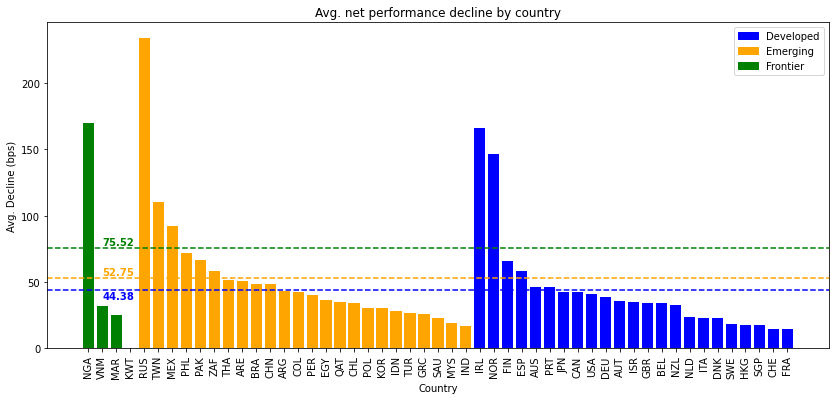

In [39]:
#Copy sum_tab and sort
df = sum_tab.copy()
df.sort_values(["msci", "avg_decline"], ascending=False, inplace=True)

# Create the figure and subplots
fig, ax = plt.subplots(figsize=(14,6))

# Create the barplot
ax.bar(df['iso'], df['avg_decline'], color=df['msci'].map({'developed': 'blue', 'emerging': 'orange', 'frontier': 'green'}))

# Add axis labels and title
ax.set_xticklabels(df['iso'], rotation=90)
plt.xlabel('Country')
plt.ylabel('Avg. Decline (bps)')
plt.title('Avg. net performance decline by country')

# Add legend
developed_patch = plt.Rectangle((0, 0), 1, 1, color='blue')
emerging_patch = plt.Rectangle((0, 0), 1, 1, color='orange')
frontier_patch = plt.Rectangle((0, 0), 1, 1, color='green')
ax.legend([developed_patch, emerging_patch, frontier_patch], ['Developed', 'Emerging', 'Frontier'], loc='upper right')

# Add horizontal lines for the averages
avg_by_msci = df.groupby('msci')['avg_decline'].mean()
i = -5
for msci, avg in avg_by_msci.items():
    color = df[df['msci'] == msci]['msci'].map({'developed': 'blue', 'emerging': 'orange', 'frontier': 'green'}).iloc[0]
    ax.axhline(avg, color=color, linestyle='--')
    ax.text(1, avg + i, f"{avg:.2f}", ha='left', va='center', color=color, fontweight='bold')
    i = 5

# Show the plot
plt.show()

#### 8. Looking for a possible relationship
##### 8.a Polynomial ?

In [40]:
poly= [] #Store Country
#Loop on countries
for iso in iso_list:
    cnt_data = in_vs_out[in_vs_out["iso"] == iso].copy()
    
    #Need to dropna 
    cnt_data.dropna(inplace=True)

    #Define X and Y
    X = cnt_data["in_avg"]
    Y = cnt_data["chng_perf"]
    
    #Poly Regression
    X_bis = X.values.reshape(-1,1)
    #Model
    polynomial_features = PolynomialFeatures(degree=2)
    X_poly = polynomial_features.fit_transform(X_bis)
    pr_model = sm.OLS(Y, X_poly).fit()
    y_pred = pr_model.predict(X_poly)

    #Get p-value for x²
    coeff = pr_model.params[2]
    p_val = pr_model.pvalues[2]
    if p_val<0.05:
        poly.append({"country": iso, "coeff": coeff, "pvalue": p_val})

poly_df = pd.DataFrame(poly)
print("-------"*4)
print("Countries presenting a quadratic relationship")
display(poly_df)
print("-------"*4)

----------------------------
Countries presenting a quadratic relationship


,country,coeff,pvalue
0,NOR,0.700500,0.010576
1,POL,-1.236793,0.040760


----------------------------


##### 8.b Linear?

In [41]:
#Store data
linear = []

#Loop on countries
for iso in iso_list:
    cnt_data = in_vs_out[in_vs_out["iso"] == iso].copy()
    
    #Need to dropna 
    cnt_data.dropna(inplace=True)

    #Define X and Y
    X = cnt_data["in_avg"]
    Y = cnt_data["chng_perf"]
    
    #Poly Regression
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    
    #Get the data
    intercept = model.params[0]
    x_coef = model.params[1]
    p_val = model.pvalues[1]
    
    linear.append({"iso": iso, "intercept": intercept, "x_coeff": x_coef, "p-value": p_val})

#Create dataframe
linear_df = pd.DataFrame(linear)

In [42]:
linear_df[linear_df["p-value"] > 0.05].to_excel("./nolinear.xlsx")

In [43]:
#Significant negative linear relationship
print(linear_df[linear_df["p-value"] < 0.05].shape[0], " countries present a linear relationship")
print(linear_df[(linear_df["p-value"] < 0.05)
                &(linear_df["x_coeff"] < 1)].shape[0], " of tham have a negative slope")

33  countries present a linear relationship
33  of tham have a negative slope


In [44]:
#Summary table
linear_df = pd.merge(linear_df, class_country[['excntry', 'msci_development']], how='left', left_on='iso', right_on='excntry')
linear_df = linear_df.drop('excntry', axis=1)

# Define the conditions as variables
p_value = 0.05
developed_cond = linear_df["msci_development"] == "developed"
emerging_cond = linear_df["msci_development"] == "emerging"
frontier_cond = linear_df["msci_development"] == "frontier"

# Count the number of rows for each category that meet the conditions
dev_lin = (linear_df["p-value"] < p_value) & developed_cond
dev_count = developed_cond.sum()

emg_lin = (linear_df["p-value"] < p_value) & emerging_cond
emg_count = emerging_cond.sum()

front_lin = (linear_df["p-value"] < p_value) & frontier_cond
front_count = frontier_cond.sum()

# Calculate the total counts
total_lin = dev_lin.sum() + emg_lin.sum() + front_lin.sum()
total_no_lin = (dev_count - dev_lin.sum()) + (emg_count - emg_lin.sum()) + (front_count - front_lin.sum())

# Create a table and add the data
table = PrettyTable()
table.field_names = ["Category", "Linear Relationship", "No Linear Relationship", "Total"]
table.add_row(["Developed", dev_lin.sum(), dev_count - dev_lin.sum(), dev_count])
table.add_row(["Emerging", emg_lin.sum(), emg_count - emg_lin.sum(), emg_count])
table.add_row(["Frontier", front_lin.sum(), front_count - front_lin.sum(), front_count])
table.add_row(["Total", total_lin, total_no_lin, dev_count + emg_count + front_count])

# Print the table
print(table)

+-----------+---------------------+------------------------+-------+
|  Category | Linear Relationship | No Linear Relationship | Total |
+-----------+---------------------+------------------------+-------+
| Developed |          16         |           7            |   23  |
|  Emerging |          15         |           9            |   24  |
|  Frontier |          2          |           2            |   4   |
|   Total   |          33         |           18           |   51  |
+-----------+---------------------+------------------------+-------+


In [45]:
#Nice Table for coefficients
#add MSCI
table_df = pd.DataFrame()
groupby_cnt = linear_df[linear_df["p-value"] < 0.05].groupby("msci_development")

for msci in linear_df["msci_development"].unique():
    get_cnt = groupby_cnt.get_group(msci)
    df_cnt = pd.DataFrame(get_cnt.groupby(pd.cut(get_cnt["x_coeff"], np.arange(-1.6,0,0.2))).count()["x_coeff"])
    df_cnt.columns = [msci]
    if table_df.shape == (0,0):
        table_df = df_cnt
    else:
        table_df = table_df.join(df_cnt)

#Add total for rows & columns
table_df["Total"] = table_df[list(table_df.columns)].sum(axis=1)
table_df.index = table_df.index.astype(str)
table_df.loc["Total"] = table_df.sum().values.tolist()

print(table_df)

              developed  emerging  frontier  Total
x_coeff                                           
(-1.6, -1.4]          1         0         0      1
(-1.4, -1.2]          0         0         0      0
(-1.2, -1.0]          0         1         0      1
(-1.0, -0.8]          1         5         1      7
(-0.8, -0.6]          3         6         1     10
(-0.6, -0.4]          5         3         0      8
(-0.4, -0.2]          6         0         0      6
Total                16        15         2     33


#### 9. Dispersion of net performance in-sample

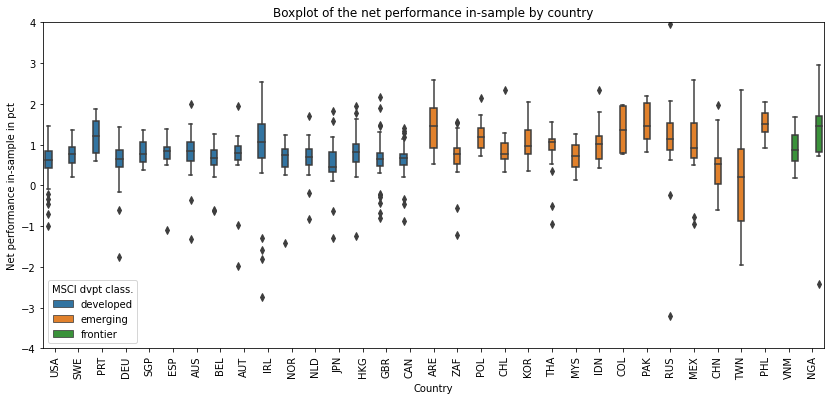

In [46]:
#Create a copy
disp_df = in_vs_out.copy()
#Select countries with linear relationship
disp_df = disp_df[disp_df["iso"].isin(linear_df[linear_df["p-value"] < 0.05]["iso"])]

#Add msci classification
df_c = class_country[class_country["excntry"].isin(disp_df["iso"])][["excntry", "msci_development"]]
df_c.columns=["iso", "msci_development"]
disp_df = disp_df.merge(df_c, on="iso")
disp_df.sort_values("msci_development", inplace=True)

#Create the boxplot
plt.figure(figsize=(14, 6))
plt.title("Boxplot of the net performance in-sample by country")
ax = sns.boxplot(x="iso", y="in_avg", data=disp_df, hue="msci_development")

#Set axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(-4,4)
ax.set_ylabel("Net performance in-sample in pct")
ax.set_xlabel("Country")
ax.legend(title="MSCI dvpt class.", loc="lower left")

plt.show();

In [47]:
disp_df

,iso,characteristic,in_avg,out_avg,chng_perf,msci_development
0,USA,age,-0.463631,-0.290848,0.172783,developed
494,SWE,ebitda_mev,0.934525,0.332481,-0.602044,developed
495,SWE,op_at,0.996057,0.566291,-0.429766,developed
496,SWE,ope_be,0.911105,0.354210,-0.556895,developed
497,SWE,opex_at,0.540661,0.394303,-0.146358,developed
...,...,...,...,...,...,...
959,NGA,rmax5_rvol_21d,1.499496,NaN,NaN,frontier
963,NGA,niq_be_chg1,1.805924,2.038150,0.232226,frontier
962,NGA,mispricing_mgmt,1.440208,0.474655,-0.965552,frontier
960,NGA,rskew_21d,-2.414732,-0.556167,1.858564,frontier


Text(0.5, 0, 'MSCI dvpt class')

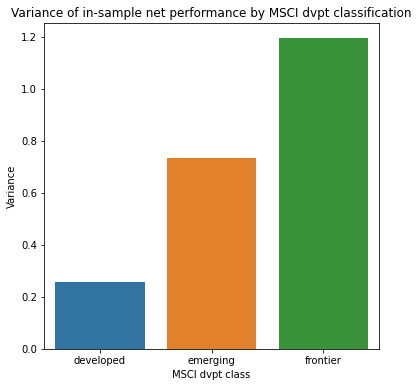

In [51]:
#Define Dataframe
var = pd.DataFrame(disp_df.groupby("msci_development")["in_avg"].var()).reset_index()
var.sort_values("msci_development", inplace=True)

#Plotting
plt.figure(figsize=(6,6))
sns.barplot(data=var, x="msci_development", y="in_avg")

#Legend & axis
plt.title("Variance of in-sample net performance by MSCI dvpt classification")
plt.ylabel("Variance")
plt.xlabel("MSCI dvpt class")